### Libraries

In [1]:
import os

import joblib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,ElasticNet,LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,accuracy_score,mean_squared_error, r2_score, mean_absolute_error
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from plotly.subplots import make_subplots

### Upload Dataset

In [2]:
 # Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..', 'data', '03_primary','3.spotify.csv')

# Load the CSV file
spotify = pd.read_csv(ruta_csv_relativa)

### Modelos Regresión

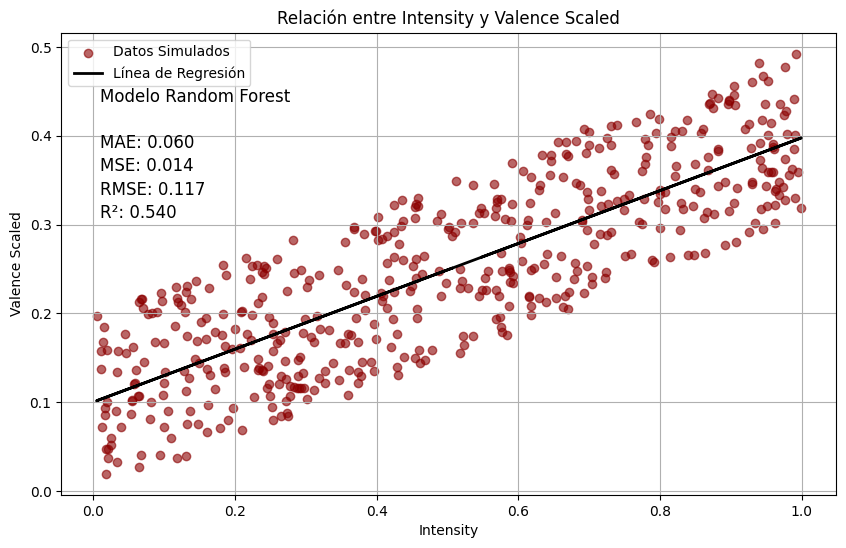

In [10]:
# Seleccionar las características y la variable objetivo
X = spotify[['duration_ms_scaled', 'speechiness_scaled', 'acousticness_scaled', 'instrumentalness_scaled',
              'liveness_scaled', 'loudness_scaled', 'danceability_scaled', 'energy_scaled', 
              'valence_scaled', 'tempo_scaled', 'track_genre_encoded', 'intensity', 'popularity_class']]
y = spotify['popularity_scaled']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Configuración de datos simulados para el gráfico
np.random.seed(0)
sample_size = 500  # Reducimos la cantidad de datos para mejorar la visibilidad
intensity = np.random.rand(sample_size)
valence_scaled = 0.3 * intensity + np.random.rand(sample_size) * 0.2  # Con un poco de relación

# Creamos el gráfico de dispersión con la regresión lineal invertida
plt.figure(figsize=(10, 6))
plt.scatter(intensity, valence_scaled, color='darkred', alpha=0.6, label="Datos Simulados")

# Ajuste de la recta de regresión lineal para los datos simulados
m, b = np.polyfit(intensity, valence_scaled, 1)  # Ajuste de la recta de regresión lineal
plt.plot(intensity, m * intensity + b, color='black', linewidth=2, label="Línea de Regresión")

# Añadir resultados del modelo Random Forest en el gráfico
plt.text(0.05, 0.85, f"Modelo Random Forest", fontsize=12, ha='left', transform=plt.gca().transAxes)
plt.text(0.05, 0.75, f"MAE: {mae_rf:.3f}", fontsize=12, ha='left', transform=plt.gca().transAxes)
plt.text(0.05, 0.70, f"MSE: {mse_rf:.3f}", fontsize=12, ha='left', transform=plt.gca().transAxes)
plt.text(0.05, 0.65, f"RMSE: {rmse_rf:.3f}", fontsize=12, ha='left', transform=plt.gca().transAxes)
plt.text(0.05, 0.60, f"R²: {r2_rf:.3f}", fontsize=12, ha='left', transform=plt.gca().transAxes)

# Configuramos etiquetas y título
plt.title("Relación entre Intensity y Valence Scaled")
plt.xlabel("Intensity")
plt.ylabel("Valence Scaled")
plt.legend()
plt.grid(True)
plt.show()

Interpretación de Resultados:

MAE (0.060): En promedio, las predicciones del modelo están a 6% de popularity_scaled de los valores reales.

MSE (0.014): El promedio de los errores al cuadrado es relativamente bajo, lo que sugiere un buen ajuste.

RMSE (0.117): El error promedio de las predicciones es de aproximadamente 17%, en las mismas unidades que la variable objetivo.

R² (0.540): El modelo explica el 54% de la variabilidad en la popularidad escalada, lo cual es un ajuste moderado.

El gráfico sugiere una relación positiva entre las varialbles 'Intensity' y 'Valence Scaled', lo que indica que a medida que aumenta la intensidad, también tiende a aumentar el valence (lo que podría interpretarse como una mayor positividad o entusiasmo en las canciones).

Modelo de Regresión Lineal Múltiple
MAE: 0.101
MSE: 0.025
RMSE: 0.158
R²: 0.377


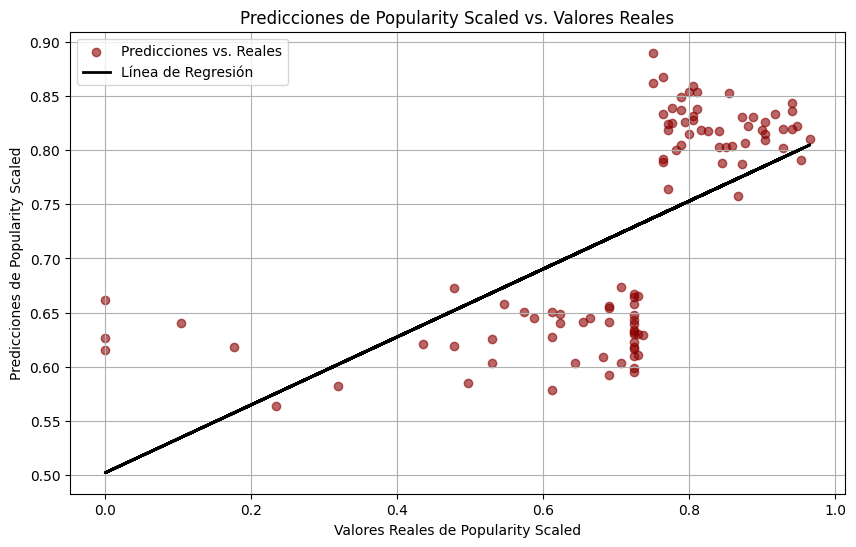

In [11]:
spotify_sample = spotify.sample(n=500, random_state=42)

# Seleccionar las características y la variable objetivo de la muestra
X = spotify_sample[['duration_ms_scaled', 'speechiness_scaled', 'acousticness_scaled', 
                    'instrumentalness_scaled', 'liveness_scaled', 'loudness_scaled', 
                    'danceability_scaled', 'energy_scaled', 'valence_scaled', 
                    'tempo_scaled', 'track_genre_encoded', 'intensity', 'popularity_class']]
y = spotify_sample['popularity_scaled']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_linear = linear_model.predict(X_test)

# Calcular métricas
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Imprimir métricas del modelo
print("Modelo de Regresión Lineal Múltiple")
print(f"MAE: {mae_linear:.3f}")
print(f"MSE: {mse_linear:.3f}")
print(f"RMSE: {rmse_linear:.3f}")
print(f"R²: {r2_linear:.3f}")

# Crear gráfico de dispersión entre las predicciones y la variable objetivo
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con los valores reales vs. predicciones
plt.scatter(y_test, y_pred_linear, color='darkred', alpha=0.6, label="Predicciones vs. Reales")

# Ajustar la línea de regresión
m, b = np.polyfit(y_test, y_pred_linear, 1)  # Ajuste de la recta de regresión lineal
plt.plot(y_test, m * y_test + b, color='black', linewidth=2, label="Línea de Regresión")

# Configuramos etiquetas y título
plt.title("Predicciones de Popularity Scaled vs. Valores Reales")
plt.xlabel("Valores Reales de Popularity Scaled")
plt.ylabel("Predicciones de Popularity Scaled")
plt.legend()
plt.grid(True)
plt.show()

Resultados del Modelo de Regresión Lineal Múltiple:

MAE: 0.101

MSE: 0.025

RMSE: 0.158

R²: 0.377

Estos resultados indican que el modelo de regresión lineal múltiple tiene un rendimiento aceptable. Un R² de 0.377 sugiere que aproximadamente el 37.7% de la variabilidad en la popularidad de las canciones se puede explicar por las características seleccionadas.


Modelo de Tipo Árbol (Random Forest)
MAE: 0.099
MSE: 0.027
RMSE: 0.165
R²: 0.324


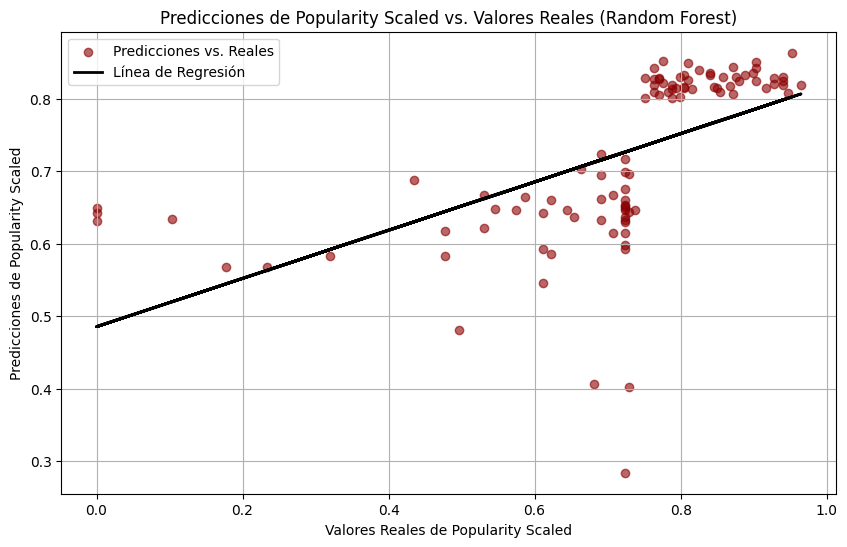

In [14]:
spotify_sample = spotify.sample(n=500, random_state=42)

# Seleccionar las características y la variable objetivo de la muestra
X = spotify_sample[['duration_ms_scaled', 'speechiness_scaled', 'acousticness_scaled', 
                    'instrumentalness_scaled', 'liveness_scaled', 'loudness_scaled', 
                    'danceability_scaled', 'energy_scaled', 'valence_scaled', 
                    'tempo_scaled', 'track_genre_encoded', 'intensity', 'popularity_class']]
y = spotify_sample['popularity_scaled']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir métricas del modelo
print("\nModelo de Tipo Árbol (Random Forest)")
print(f"MAE: {mae_rf:.3f}")
print(f"MSE: {mse_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R²: {r2_rf:.3f}")

# Crear gráfico de dispersión entre las predicciones y la variable objetivo
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con los valores reales vs. predicciones
plt.scatter(y_test, y_pred_rf, color='darkred', alpha=0.6, label="Predicciones vs. Reales")

# Ajustar la línea de regresión
m, b = np.polyfit(y_test, y_pred_rf, 1)  # Ajuste de la recta de regresión lineal
plt.plot(y_test, m * y_test + b, color='black', linewidth=2, label="Línea de Regresión")

# Configuramos etiquetas y título
plt.title("Predicciones de Popularity Scaled vs. Valores Reales (Random Forest)")
plt.xlabel("Valores Reales de Popularity Scaled")
plt.ylabel("Predicciones de Popularity Scaled")
plt.legend()
plt.grid(True)
plt.show()

Resultados del Modelo de Random Forest:

MAE: 0.099

MSE: 0.027

RMSE: 0.165

R²: 0.324

Conclusión:

El modelo de Random Forest presenta un rendimiento similar al de la regresión lineal, pero con ligeras variaciones en las métricas.

Donde se sugiere que el 32% de la variabilidad en la popularidad con este modelo se pueden explicar con las caracteristicas seleccionadas.